<a href="https://colab.research.google.com/github/pipelin49/SISTEMAS-AVANZADOS-AFJR/blob/main/NavarreteWendy_Jimenez_Andres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Clase 1 (2h): Introducción a Jupyter/Colab y al entorno de análisis de datos en Python

**Objetivos de la sesión**
- Configurar y usar Google Colab como entorno de trabajo.
- Comprender la estructura de un notebook (celdas de código y Markdown) y buenas prácticas.
- Importar y verificar librerías clave para análisis de datos: `numpy`, `pandas`, `matplotlib`, `seaborn`, `statsmodels`.
- Cargar un `.csv` y realizar una exploración inicial.
- Practicar *slicing* (filas/columnas) y conteo de valores faltantes.



## Flujo de trabajo recomendado (Colab ⇄ GitHub)
1. Abre este notebook en **Google Colab**.
2. Guarda una copia en tu repositorio: `Archivo → Guardar una copia en GitHub`.
3. Versiona tu trabajo repitiendo el guardado al final de la clase.



## Notebooks: estructura y ejecución
- Celdas **Código** y **Markdown**.
- Ejecuta con `Shift + Enter`.
- Modos: **Editar** (borde verde) y **Comando** (borde azul).  
  Atajos: `A` (arriba), `B` (abajo), `M` (Markdown), `Y` (Código), `D D` (borrar).


In [ ]:
print('Hola, Notebook 👋')
1 + 2

Hola, Notebook 👋


3

In [ ]:
print(1 + 2)
1 + 3

3


4

In [ ]:
1 + 2
1 + 3;  # suprime la última salida


## Buenas prácticas
- Indentación 4 espacios · Comentarios que expliquen el “por qué” · Longitud ≤ 100 · Bloques lógicos.


In [ ]:

resultado = []
for x in range(10):
    for y in range(5):
        if x * y > 10:
            resultado.append((x, y))
print(resultado)


[(3, 4), (4, 3), (4, 4), (5, 3), (5, 4), (6, 2), (6, 3), (6, 4), (7, 2), (7, 3), (7, 4), (8, 2), (8, 3), (8, 4), (9, 2), (9, 3), (9, 4)]



## Librerías clave
`numpy`, `pandas`, `matplotlib`, `seaborn`, `statsmodels`


In [ ]:

# !pip install numpy pandas matplotlib seaborn statsmodels --quiet  # Descomenta si hace falta
import sys, platform
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
print("Python:", sys.version.split()[0], "|", platform.platform())
print("NumPy:", np.__version__, "| pandas:", pd.__version__, "| matplotlib:", plt.matplotlib.__version__)
print("seaborn:", sns.__version__, "| statsmodels:", sm.__version__)


Python: 3.12.11 | Linux-6.1.123+-x86_64-with-glibc2.35
NumPy: 2.0.2 | pandas: 2.2.2 | matplotlib: 3.10.0
seaborn: 0.13.2 | statsmodels: 0.14.5


## Cargar datos (elige una opción)

In [ ]:

# Opción A) Subir CSV desde tu equipo
from io import BytesIO
import pandas as pd
try:
    from google.colab import files
    uploaded = files.upload()
    if len(uploaded):
        fname, fbytes = next(iter(uploaded.items()))
        da = pd.read_csv(BytesIO(fbytes))
        print("Archivo cargado:", fname, "| shape:", da.shape)
        display(da.head())
except Exception as e:
    print("Si no estás en Colab o prefieres otra opción, usa la Opción B/C/D. Detalle:", e)


In [ ]:

# Opción B) URL directa a .csv
# url = "https://ejemplo.org/datos.csv"
# da = pd.read_csv(url); da.head()


In [ ]:

# Opción C) Leer desde Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# da = pd.read_csv('/content/drive/MiCarpeta/datos.csv')
# da.head()


### Opción D) Dataset de ejemplo

In [ ]:

import numpy as np, pandas as pd
np.random.seed(42)
n = 250
da = pd.DataFrame({
    "SEQN": np.arange(1, n+1),
    "RIAGENDR": np.random.choice([1, 2], size=n),
    "RIDAGEYR": np.random.randint(18, 80, size=n),
    "BMXWT": np.round(np.random.normal(70, 12, size=n), 1),
    "BMXHT": np.round(np.random.normal(168, 10, size=n), 1),
})
da["BMXBMI"] = np.round(da["BMXWT"] / (da["BMXHT"]/100)**2, 1)
da.loc[np.random.choice(da.index, size=10, replace=False), "BMXWT"] = np.nan
da.head()


## Exploración inicial

In [ ]:

print("shape:", da.shape)
print("columnas:", list(da.columns))
display(da.dtypes)
display(da.head())
display(da.describe(include='all'))


## *Slicing* (filas y columnas)

In [ ]:

w = da["RIDAGEYR"]; x = da.loc[:, "RIDAGEYR"]; y = da.RIDAGEYR
z = da.iloc[:, da.columns.get_loc("RIDAGEYR")]
print("Max RIDAGEYR (cuatro formas):", w.max(), x.max(), y.max(), z.max())
fila4 = da.iloc[3, :]; fila4


## Faltantes

In [ ]:

faltantes_bmxwt = pd.isnull(da["BMXWT"]).sum()
no_faltantes_bmxwt = pd.notnull(da["BMXWT"]).sum()
print("BMXWT → faltantes:", faltantes_bmxwt, "| no faltantes:", no_faltantes_bmxwt)


## Visualización rápida

In [ ]:

col = "BMXBMI" if "BMXBMI" in da.columns else da.select_dtypes(include='number').columns[0]
plt.figure(); da[col].hist(bins=20)
plt.title(f"Histograma de {col}"); plt.xlabel(col); plt.ylabel("Frecuencia"); plt.show()



## Ejercicios (para tu repositorio) Solucion taller
1) Reporta `shape`, `columns`, `dtypes`, `head`, `describe`.  
2) Dos variables numéricas: media, mediana, desviación estándar y cuantiles (25%, 50%, 75%).  
3) Tabla de frecuencias para una variable categórica.  
4) Columnas con valores faltantes y conteo por variable.  
5) (Opcional) Nueva columna derivada y su distribución.

**SOLUCIÓN TALLER 1**
Respuestas (agrega tus celdas debajo de cada pregunta) Importante: No borres ni edites las celdas de enunciado. Añade tus respuestas debajo de cada pregunta, para ello copia cada pregunta y responde si requieres texto agrega +Texto, si requieres código, agrega más código.

Integrante 1: ANDRES JIMENEZ

Enlace Github 1:

Integrante 2: WENDY NAVARRETE

Enlace Github 2: https://github.com/wendyka18/Mi-Primera-Actividad/blob/48aab7d4a2108b683f65e5849fe86081b29a085b/NavarreteWendy_Jimenez_Andres.ipynb




### Respuestas del estudiante (Markdown)
<div class="response-box">
Escribe aquí tu análisis y conclusiones para los puntos 1–5.
</div>


In [ ]:
# Respuestas del estudiante (Código)
# TODO: Añade aquí tu código para los ejercicios de la Clase 1


In [ ]:
# Creación del dataframe
import pandas as pd
import numpy as np
n = 350  # Define 'n' before using it
df=pd.DataFrame({
    "Cantidad": np.arange(1, n+1),
    "Estracto": np.random.choice([1, 2], size=n),
    "Edad": np.random.randint(18, 80, size=n),
    "Peso": np.round(np.random.normal(70, 12, size=n), 1),
    "Estatura": np.round(np.random.normal(168, 10, size=n), 1),
})

In [ ]:
# Imprimir el dataframe
df

,Cantidad,Estracto,Edad,Peso,Estatura
0,1,2,47,72.2,165.0
1,2,2,45,66.2,161.7
2,3,2,19,57.1,171.5
3,4,2,20,67.7,154.5
4,5,2,79,67.2,177.0
...,...,...,...,...,...
345,346,1,30,68.8,172.9
346,347,2,37,75.4,159.0
347,348,2,69,88.3,171.8
348,349,2,67,47.6,178.8


In [ ]:
# 1) Reporta `shape`, `columns`, `dtypes`, `head`, `describe`.

In [ ]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(350, 5)
Index(['Cantidad', 'Estracto', 'Edad', 'Peso', 'Estatura'], dtype='object')
Cantidad      int64
Estracto      int64
Edad          int64
Peso        float64
Estatura    float64
dtype: object


Este bloque de código sirve para explorar la estructura del DataFrame: muestra que tiene 350 filas y 5 columnas, los nombres de esas columnas (Cantidad, Estracto, Edad, Peso y Estatura) y el tipo de dato de cada una, donde algunas son enteros (int64) y otras decimales (float64).

In [ ]:
df.head(12)

,Cantidad,Estracto,Edad,Peso,Estatura
0,1,2,47,72.2,165.0
1,2,2,45,66.2,161.7
2,3,2,19,57.1,171.5
3,4,2,20,67.7,154.5
4,5,2,79,67.2,177.0
5,6,2,69,74.7,169.5
6,7,1,46,57.6,173.8
7,8,2,57,80.5,179.9
8,9,1,27,70.5,167.3
9,10,1,72,50.0,177.4


El comando `df.head(12)` se utiliza para visualizar las primeras 12 filas del DataFrame, permitiendo revisar una muestra inicial de los datos generados en todas las columnas. Esto es útil para asegurarse de que la información se haya creado correctamente y tener una idea del contenido de la tabla antes de aplicar análisis más profundos.


In [ ]:
df.describe()

,Cantidad,Estracto,Edad,Peso,Estatura
count,350.000000,350.000000,350.000000,350.000000,350.000000
mean,175.500000,1.448571,49.965714,70.703143,168.252571
std,101.180532,0.498060,17.403487,12.070021,9.662902
min,1.000000,1.000000,18.000000,35.500000,141.900000
25%,88.250000,1.000000,34.250000,63.200000,161.525000
50%,175.500000,1.000000,50.500000,71.000000,168.450000
75%,262.750000,2.000000,65.000000,78.900000,174.600000
max,350.000000,2.000000,79.000000,105.000000,196.900000


El comando df.describe() genera un resumen estadístico de todas las columnas numéricas del DataFrame. Muestra métricas como la cantidad de datos (count), el promedio (mean), la desviación estándar (std), los valores mínimo y máximo, así como los percentiles (25%, 50% y 75%). Este análisis permite tener una visión rápida de la distribución y el rango de los datos

In [ ]:
# 2) Dos variables numéricas: media, mediana, desviación estándar y cuantiles (25%, 50%, 75%).

In [ ]:
df['Edad'].describe()

,Edad
count,350.000000
mean,49.965714
std,17.403487
min,18.000000
25%,34.250000
50%,50.500000
75%,65.000000
max,79.000000


El comando df['Edad'].describe() genera un resumen estadístico únicamente para la columna "Edad".

In [ ]:
df['Edad'].median()

50.5

El comando df['Edad'].median() calcula la mediana de la columna "Edad", es decir, el valor central cuando todas las edades están ordenadas

In [ ]:
df['Estatura'].describe()

,Estatura
count,350.000000
mean,168.252571
std,9.662902
min,141.900000
25%,161.525000
50%,168.450000
75%,174.600000
max,196.900000


Por su parte, df['Estatura'].describe() genera un resumen estadístico de la columna "Estatura", mostrando el conteo de datos, la media, la desviación estándar, los valores mínimo y máximo, y los percentiles (25%, 50% y 75%)

In [ ]:
df['Estatura'].median()

168.45

El comando df['Estatura'].median() calcula la mediana de la columna "Estatura", es decir, el valor central cuando todas las edades están ordenadas

In [ ]:
# 3) Tabla de frecuencias para una variable categórica.
categorias=["F","M"]
df["Genero"] = np.random.choice(categorias,size=len(df))
df

,Cantidad,Estracto,Edad,Peso,Estatura,Genero
0,1,2,47,72.2,165.0,M
1,2,2,45,66.2,161.7,F
2,3,2,19,57.1,171.5,M
3,4,2,20,67.7,154.5,M
4,5,2,79,67.2,177.0,F
...,...,...,...,...,...,...
345,346,1,30,68.8,172.9,F
346,347,2,37,75.4,159.0,M
347,348,2,69,88.3,171.8,F
348,349,2,67,47.6,178.8,F


Este fragmento de código agrega una nueva columna llamada “Genero” al DataFrame. Primero se define una lista de categorías ["F", "M"] que representan femenino y masculino. Luego, con np.random.choice(categorias, size=len(df)), se asigna aleatoriamente a cada fila del DataFrame uno de esos valores, de modo que todas las 350 filas tendrán un género generado al azar. Finalmente, al escribir df, se muestra la tabla actualizada con esta nueva columna.

In [ ]:
df.groupby("Genero")["Cantidad"].sum()

,Cantidad
Genero,
F,31589
M,29836


Este comando agrupa el DataFrame por la columna “Genero” y luego calcula la suma de los valores en la columna “Cantidad” para cada grupo. En otras palabras, separa los datos entre hombres (“M”) y mujeres (“F”), y suma los números consecutivos de la columna “Cantidad” dentro de cada categoría.

In [ ]:
# 4) Columnas con valores faltantes y conteo por variable.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cantidad  350 non-null    int64  
 1   Estracto  350 non-null    int64  
 2   Edad      350 non-null    int64  
 3   Peso      350 non-null    float64
 4   Estatura  350 non-null    float64
 5   Genero    350 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 16.5+ KB


El comando df.info() muestra un resumen general del DataFrame, indicando el número total de filas y columnas, el nombre y tipo de cada columna, cuántos valores no nulos tiene cada una, y el tipo de datos utilizado en memoria.

In [ ]:
for columna in df.columns:
  print(columna,len(df[columna]))

Cantidad 350
Estracto 350
Edad 350
Peso 350
Estatura 350
Genero 350


recorre todas las columnas de un DataFrame de pandas llamado df. Para cada columna, imprime su nombre (columna) y la cantidad de elementos que contiene, utilizando la función len().

In [ ]:
# 5) (Opcional) Nueva columna derivada y su distribución.

In [ ]:
df["Distribución"]= df["Edad"] * 2
df

,Cantidad,Estracto,Edad,Peso,Estatura,Genero,Distribución
0,1,2,47,72.2,165.0,M,94
1,2,2,45,66.2,161.7,F,90
2,3,2,19,57.1,171.5,M,38
3,4,2,20,67.7,154.5,M,40
4,5,2,79,67.2,177.0,F,158
...,...,...,...,...,...,...,...
345,346,1,30,68.8,172.9,F,60
346,347,2,37,75.4,159.0,M,74
347,348,2,69,88.3,171.8,F,138
348,349,2,67,47.6,178.8,F,134


usando la biblioteca pandas, crea una nueva columna llamada "Distribución" dentro del DataFrame df. Esta nueva columna se genera multiplicando por 2 cada valor existente en la columna "Edad". Es decir, toma los valores de "Edad" y los duplica, guardando el resultado en la nueva columna. Luego, al escribir solo df, se muestra el DataFrame actualizado con esta nueva columna incluida.

<Axes: >

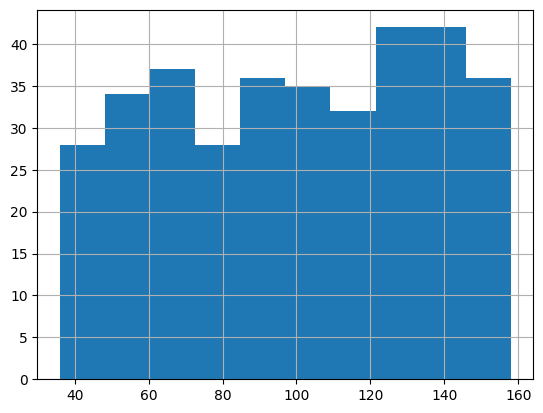

In [ ]:
df['Distribución'].hist()

Este código genera un histograma de la columna "Distribución" del DataFrame df. La función .hist() crea una gráfica que muestra cómo se distribuyen los valores numéricos en esa columna, agrupándolos en intervalos (bins). Es una herramienta útil para visualizar la frecuencia de los datos y detectar patrones como simetría, sesgo, o valores atípicos en la columna "Distribución".
